In [1]:
import sys
sys.path.append("/vol/bitbucket/ad6013/Research/gp-causal")
import numpy as np
import matplotlib.pyplot as plt
import gpflow 
import tensorflow as tf

In [2]:
DATA_SIZE = 1000

In [3]:
# Get the kernels ready 
kernel_lengthscale = np.random.gamma(1, 0.5)
kernel_variance_sq_exp = 1.0

sq_exp = gpflow.kernels.SquaredExponential(
    lengthscales=[kernel_lengthscale]
)
sq_exp.variance.assign(kernel_variance_sq_exp)
kernel = sq_exp

likelihood_noise = 1e-4

# Sample latents
latent = np.random.normal(0, 1, size=(DATA_SIZE, 1))

2022-10-11 17:39:43.335732: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 17:39:43.342309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 17:39:43.342432: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-11 17:39:43.343192: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
from tqdm import trange


# Sample from a GP with identity mean function
cov = kernel.K(latent)
mean = latent[:, 0]
# mean = np.zeros(DATA_SIZE)
X = np.random.multivariate_normal(
        mean=mean,
        cov=cov + likelihood_noise * np.eye(DATA_SIZE)
    )

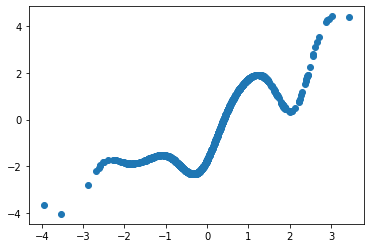

In [5]:
plt.scatter(latent, X)
plt.show()
plt.close()

In [6]:
# Get the kernels ready 
kernel_lengthscale_1 = np.random.gamma(1, 1)
kernel_lengthscale_2 = np.random.gamma(2, 5)
kernel_variance_sq_exp = 1.0


sq_exp = gpflow.kernels.SquaredExponential(
    lengthscales=[kernel_lengthscale_1, kernel_lengthscale_2]
)
sq_exp.variance.assign(kernel_variance_sq_exp)
kernel = sq_exp

likelihood_noise = 1e-4

# Sample latents
latent = np.random.normal(0, 1, size=(DATA_SIZE, 1))

full_input = np.concatenate(
    (X[:, None], latent),
    axis=1
)

In [7]:
from gpflow.models import GPR
from tqdm import trange


# Sample from a GP with identity mean function
cov = kernel.K(full_input)
mean = np.zeros(DATA_SIZE)
Y = np.random.multivariate_normal(
        mean=mean,
        cov=cov + np.eye(DATA_SIZE) * likelihood_noise
    )

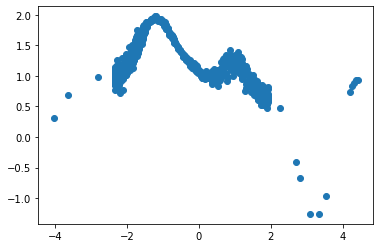

In [8]:
plt.scatter(X, Y)
plt.show()
plt.close()

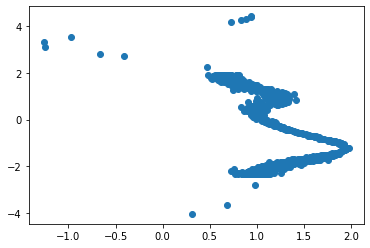

In [9]:
plt.scatter(Y, X)
plt.show()
plt.close()

In [2]:
import sys
sys.path.append("/vol/bitbucket/ad6013/Research/gp-causal")
import pickle

In [34]:
import csv
import numpy as np


file = "/vol/bitbucket/ad6013/Research/gp-causal/data/gplvm_pairs/files/gplvm_pairs_2.npy"

# to read file you saved
gplvm_pairs = np.load(file)

In [35]:
gplvm_pairs

array([[[ 0.11863848,  0.52899476],
        [-0.39123428,  0.08000723],
        [-2.10527556, -2.16295702],
        ...,
        [-0.14453061, -0.58062244],
        [-1.31136951,  0.19095213],
        [ 0.4459965 ,  1.86786631]],

       [[-0.56234455, -0.3608215 ],
        [-1.12770571, -1.32816169],
        [-1.52457611, -1.84425763],
        ...,
        [-0.44442836, -0.16982324],
        [-1.57819167, -1.67740275],
        [-1.57130243, -2.04533902]],

       [[ 0.46698182,  1.58847894],
        [-2.29671359, -0.84196707],
        [-3.43043404, -1.79634539],
        ...,
        [-1.44826678, -0.09882443],
        [ 2.39378627,  4.08888928],
        [ 2.29153224,  3.66136989]],

       ...,

       [[-0.86774468, -0.91297161],
        [ 0.53348866,  0.86338705],
        [-0.59225863, -1.02932832],
        ...,
        [ 0.8098239 ,  1.31774358],
        [-4.29036229, -1.65040799],
        [ 1.62810864,  2.55961439]],

       [[-2.0654274 , -2.76818757],
        [-1.85174811, -2.89

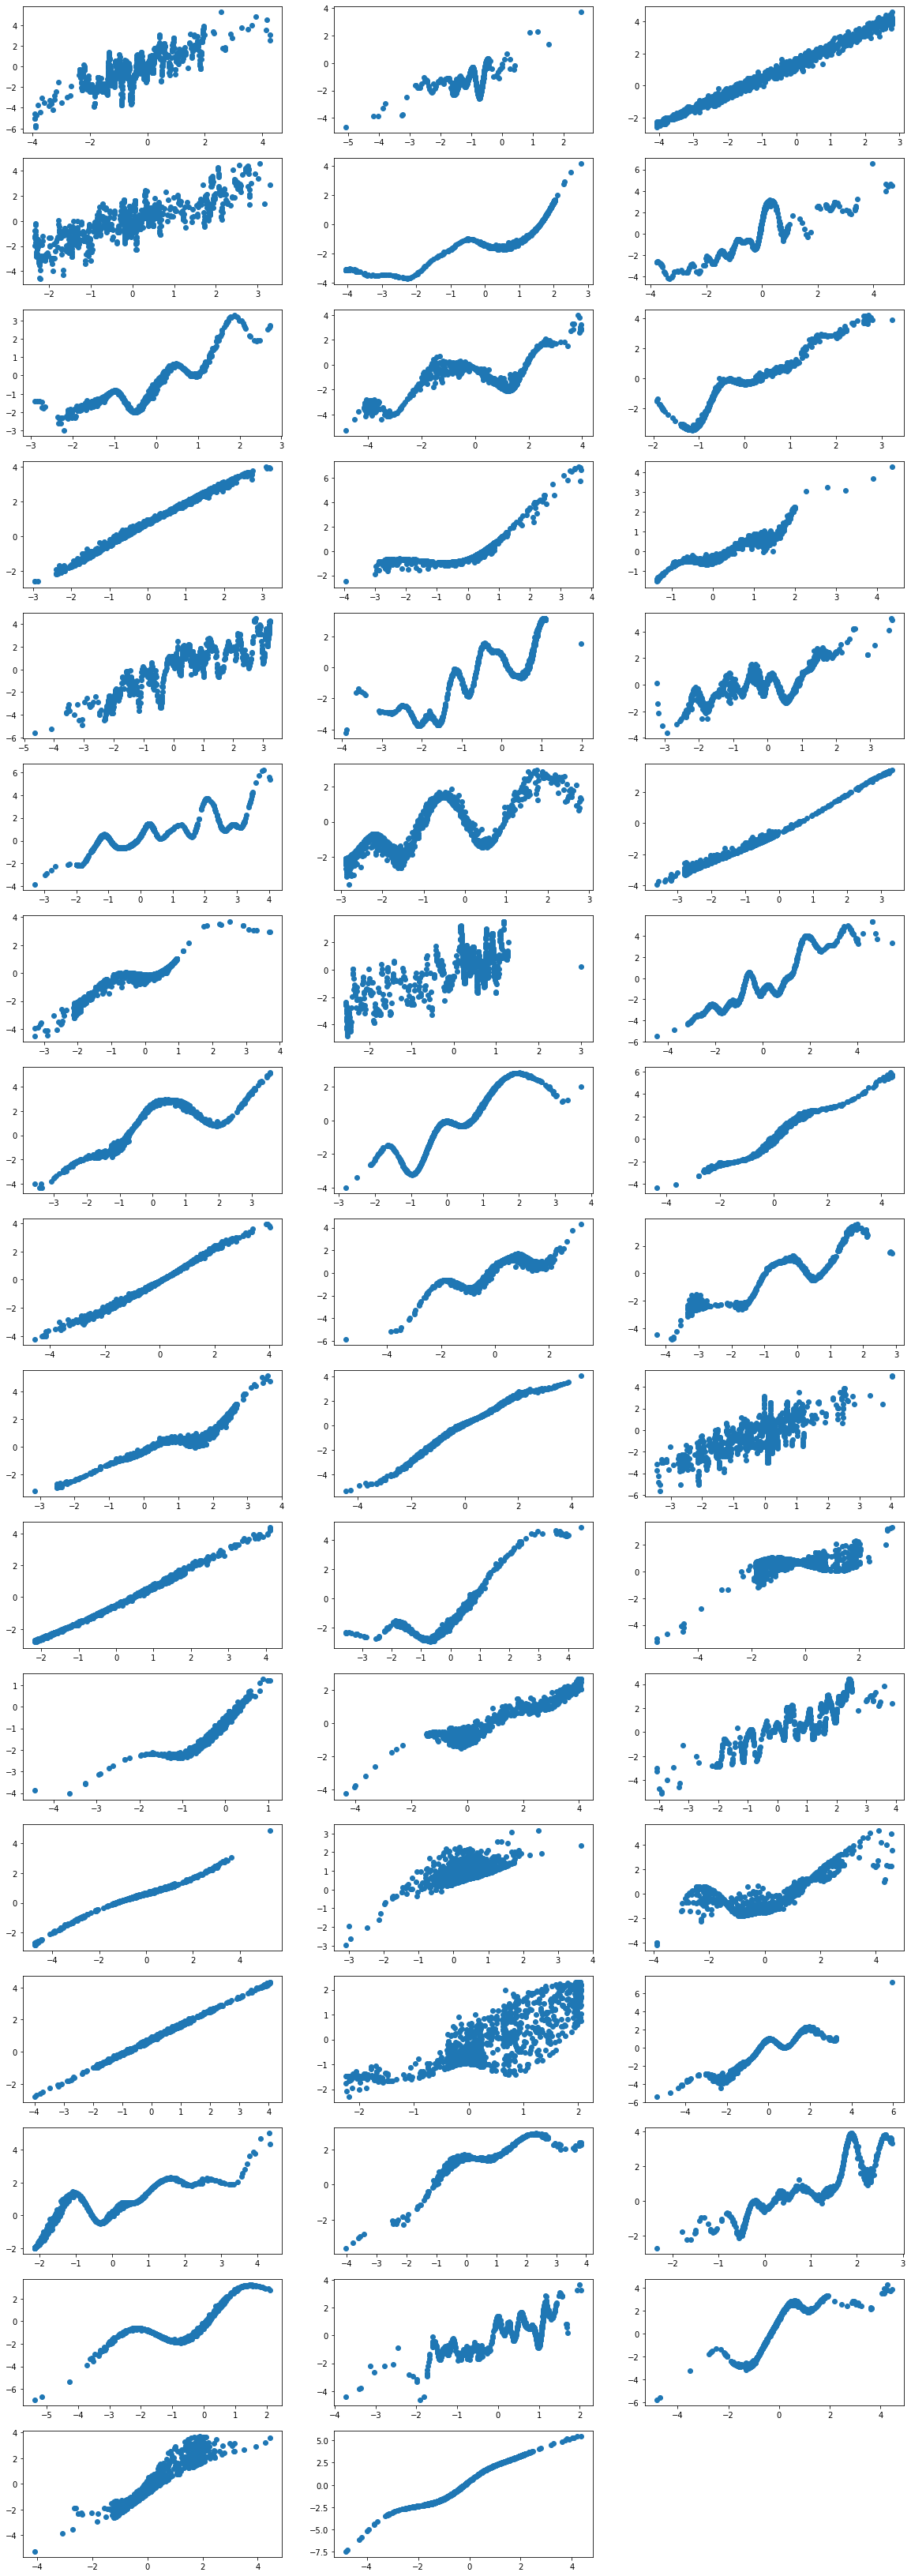

In [36]:
import matplotlib.pyplot as plt
# plt.subplots_adjust(hspace=0.5)
plt.figure(figsize=(20, 70))

for i in range(0, 50):
    ax = plt.subplot(20, 3, i + 1)
    ax.scatter(gplvm_pairs[i, :, 0], gplvm_pairs[i, :, 1])
plt.show()
plt.close()